## CDC Overdose Death Rate - Predictive Model (Baseline)
**Purpose: Predict death rates using machine learning**

### 1. Import libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### 2. Load cleaned data

In [49]:
cdc = pd.read_csv("C:/Users/mmaha/projects/cdc-overdose-prediction/data/CDC_Overdose_Cleaned.csv")
print("Dataset size:", cdc.shape)
cdc.head()

Dataset size: (6971, 11)


,notes,state,state_code,county,county_code,year,year_code,deaths,population,crude_rate,death_rate_per_100k
0,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2018.0,2018.0,28.0,218022.0,12.8,12.842741
1,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2019.0,2019.0,27.0,223234.0,12.1,12.094932
2,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2020.0,2020.0,63.0,229287.0,27.5,27.476481
3,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2021.0,2021.0,88.0,239294.0,36.8,36.774846
4,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2022.0,2022.0,75.0,246435.0,30.4,30.433989


### 3. Feature Engineeering

- LabelEncoder(): Converts state names -> numbers (ML models needs numeric input)

In [50]:
# Encode "State" as numberic (labelEncoder)
le = LabelEncoder()
cdc["state_code"] = le.fit_transform(cdc["state"])

# Define predictors and target
X = cdc[["year", "population", "state_code"]]
y = cdc["death_rate_per_100k"]

### 4. Train/Test Split

- Keeps part of data unseen for testing
- Ensures the model generalizes, not memorizes

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (5576, 3)
Testing set: (1395, 3)


### Train Random Forest Model

- RandomForesRegressior: Esemble model combining many decision trees
- Learns nonlinear relationship between features and overdose deaths

In [52]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10,
    min_samples_split=5

)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

### Evaluate Model

- Evaluate prediction accuracy
- MAE = average error;
- R2 = % variance explained

In [53]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Model Performance:")
print(f"Mean Absolute Error (MAE): {mae: .2f}")
print(f"R2 Score: {r2: .3f}")

 Model Performance:
Mean Absolute Error (MAE):  10.23
R2 Score:  0.541


**Interpretation:** Mean absolute Error (MAE) = 10.23

- This means, on average, the model's predicted overdose death rate (per 100,000 population of off by plus minus 10 deaths per 100000 compared to the true value.
- For example:
  - If the average U.S. overdose rate is around 30 to 40 per 100k, than an error or 10 is moderate - not perfect but not random either
  - It suggests the model is capturing some key relationship like population and year trends), but still missing additional predictors that drive mortality differences.

**R2 Score = 0.541**
- The R2 value (coefficient of determination) tells us how much of the variation in overdose death rates the model can explain.
- An R2 of 0.541 = the model explains 54% of the variance in the county level overdose rates.
- The remaining 46% is unexplained -- likely due to
   - Social and economic variables not yet included (poverty, unemployment, education, access to treatment)
   - Random factors and data noies (surpressed counts, reporting differences)
   - Nonlinear effects that simple feature set cant fully capture.

### Feature Importance

- Shows which features matter most

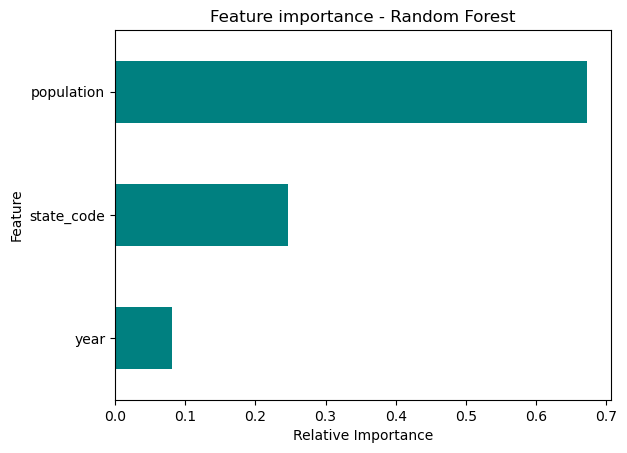

In [54]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figure=(7,4))
feat_imp.plot(kind="barh", color="teal")
plt.title("Feature importance - Random Forest")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()

In [55]:
# Example Predictions

example = X_test.copy()
example["actual_rate"]= y_test.values
example["predicted_rate"] = y_pred
example.head(10)


,year,population,state_code,actual_rate,predicted_rate
132,2020.0,221428.0,0,20.322633,24.723522
3235,2021.0,585008.0,27,15.555343,28.953547
2168,2022.0,139843.0,17,22.882804,41.636324
4085,2021.0,25798.0,33,73.649120,56.793155
4409,2022.0,168456.0,35,28.494087,37.532629
1210,2023.0,88615.0,10,23.698020,27.984271
4525,2018.0,106222.0,35,26.359888,24.945243
2470,2023.0,33593.0,20,56.559402,47.102052
3487,2020.0,221262.0,31,16.722257,33.300432
921,2018.0,85832.0,9,23.301333,21.538744


In [56]:
example.to_csv("C:/Users/mmaha/projects/cdc-overdose-prediction/outputs.csv", index=False)
print("✅ Predictions saved to outputs/model_predictions.csv")

✅ Predictions saved to outputs/model_predictions.csv
